In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def read_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')

        image_data = np.frombuffer(f.read(), dtype=np.uint8)

    images = image_data.reshape(num_images, num_rows, num_cols)
    images = images / 255.0

    return images

In [119]:
def read_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')

        label_data = np.frombuffer(f.read(), dtype=np.uint8)

    return label_data

In [120]:

train_images = read_mnist_images('data/train-images-idx3-ubyte')
train_labels = read_mnist_labels('data/train-labels-idx1-ubyte')

test_images = read_mnist_images('data/t10k-images-idx3-ubyte')
test_labels = read_mnist_labels('data/t10k-labels-idx1-ubyte')

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [121]:
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

Random Index: 2878


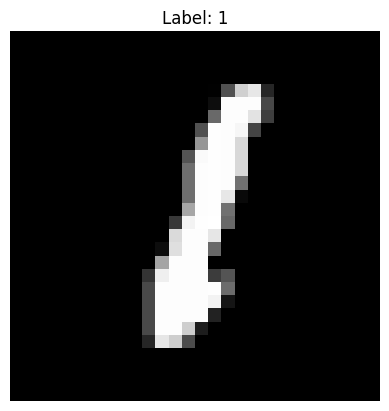

In [122]:
random_index = np.random.randint(0, len(train_images))
print(f"Random Index: {random_index}")
display_image(train_images[random_index], train_labels[random_index])

In [123]:
from knn import KNNClassifier

In [124]:
knn = KNNClassifier(n_neighbors=5)
knn.fit(train_images, train_labels)
print(f"X_train shape: {knn.X_train.shape}")
print(f"y_train shape: {knn.y_train.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [125]:
train_images_2d = train_images.reshape(train_images.shape[0], -1)
test_images_2d = test_images.reshape(test_images.shape[0], -1)

In [126]:
print("Training KNN classifier...")
knn = KNNClassifier(n_neighbors=3, metric='euclidean')
knn.fit(train_images_2d, train_labels)

Training KNN classifier...


In [127]:
print("Making predictions...")
n_samples = 1000  # Adjust based on your computational resources
test_subset = test_images_2d[:n_samples]
labels_subset = test_labels[:n_samples]
predictions = knn.predict(test_subset)


Making predictions...


In [128]:
accuracy = np.mean(predictions == labels_subset)
print(f"Accuracy on {n_samples} test samples: {accuracy:.4f}")

Accuracy on 1000 test samples: 0.9650


In [ ]:
def load_mnist():
    with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        train_images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 784)

    with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        train_labels = np.frombuffer(f.read(), dtype=np.uint8)

    with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        test_images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 784)

    with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        test_labels = np.frombuffer(f.read(), dtype=np.uint8)

    return train_images, train_labels, test_images, test_labels


In [130]:
import numpy as np
import struct
from knn import KNNClassifier  # Assuming the previous code is saved in KNNClassifier.py
import time
from collections import Counter

def load_mnist(path):
    with open(path + 'train-images-idx3-ubyte', 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        train_images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 784)

    with open(path + 'train-labels-idx1-ubyte', 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        train_labels = np.frombuffer(f.read(), dtype=np.uint8)

    with open(path + 't10k-images-idx3-ubyte', 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        test_images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 784)

    with open(path + 't10k-labels-idx1-ubyte', 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        test_labels = np.frombuffer(f.read(), dtype=np.uint8)

    return train_images, train_labels, test_images, test_labels

def train_test_split(X, y, train_size, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    num_samples = len(X)
    indices = np.random.permutation(num_samples)
    train_samples = int(num_samples * train_size)
    
    train_indices = indices[:train_samples]
    test_indices = indices[train_samples:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def classification_report(y_true, y_pred):
    labels = np.unique(y_true)
    report = ""
    
    for label in labels:
        true_positive = np.sum((y_true == label) & (y_pred == label))
        false_positive = np.sum((y_true != label) & (y_pred == label))
        false_negative = np.sum((y_true == label) & (y_pred != label))
        
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        report += f"Class {label}:\n"
        report += f"  Precision: {precision:.4f}\n"
        report += f"  Recall: {recall:.4f}\n"
        report += f"  F1-score: {f1:.4f}\n\n"
    
    return report

In [131]:
# Load MNIST data
print("Loading MNIST dataset...")
data_path = 'data/'
X_train_full, y_train_full, X_test_full, y_test_full = load_mnist(data_path)

# Normalize the data
X_train_full = X_train_full.astype(np.float32) / 255.0
X_test_full = X_test_full.astype(np.float32) / 255.0

# Use a subset of the data for quicker testing
print("Preparing data subset...")
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=5000/len(X_train_full), random_state=42)
X_test, y_test = X_test_full[:1000], y_test_full[:1000]

# Create and train the KNN classifier
print("Training KNN classifier...")
knn = KNNClassifier(n_neighbors=3, metric="euclidean")
start_time = time.time()
knn.fit(X_train, y_train)
train_time = time.time() - start_time

# Make predictions
print("Making predictions...")
start_time = time.time()
y_pred = knn.predict(X_test)
predict_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {train_time:.2f} seconds")
print(f"Prediction time: {predict_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Loading MNIST dataset...
Preparing data subset...
Training KNN classifier...
Making predictions...
Training time: 0.00 seconds
Prediction time: 14.82 seconds
Accuracy: 0.9120

Classification Report:
Class 0:
  Precision: 0.9438
  Recall: 0.9882
  F1-score: 0.9655

Class 1:
  Precision: 0.9197
  Recall: 1.0000
  F1-score: 0.9582

Class 2:
  Precision: 0.9802
  Recall: 0.8534
  F1-score: 0.9124

Class 3:
  Precision: 0.9320
  Recall: 0.8972
  F1-score: 0.9143

Class 4:
  Precision: 0.9400
  Recall: 0.8545
  F1-score: 0.8952

Class 5:
  Precision: 0.8696
  Recall: 0.9195
  F1-score: 0.8939

Class 6:
  Precision: 0.9438
  Recall: 0.9655
  F1-score: 0.9545

Class 7:
  Precision: 0.8598
  Recall: 0.9293
  F1-score: 0.8932

Class 8:
  Precision: 0.8974
  Recall: 0.7865
  F1-score: 0.8383

Class 9:
  Precision: 0.8365
  Recall: 0.9255
  F1-score: 0.8788




In [132]:
# Create and train the KNN classifier
print("Training KNN classifier...")
knn = KNNClassifier(n_neighbors=3, metric="manhattan")
start_time = time.time()
knn.fit(X_train, y_train)
train_time = time.time() - start_time

# Make predictions
print("Making predictions...")
start_time = time.time()
y_pred = knn.predict(X_test)
predict_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {train_time:.2f} seconds")
print(f"Prediction time: {predict_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training KNN classifier...
Making predictions...
Training time: 0.00 seconds
Prediction time: 13.06 seconds
Accuracy: 0.8980

Classification Report:
Class 0:
  Precision: 0.9545
  Recall: 0.9882
  F1-score: 0.9711

Class 1:
  Precision: 0.8690
  Recall: 1.0000
  F1-score: 0.9299

Class 2:
  Precision: 0.9479
  Recall: 0.7845
  F1-score: 0.8585

Class 3:
  Precision: 0.9223
  Recall: 0.8879
  F1-score: 0.9048

Class 4:
  Precision: 0.9286
  Recall: 0.8273
  F1-score: 0.8750

Class 5:
  Precision: 0.8681
  Recall: 0.9080
  F1-score: 0.8876

Class 6:
  Precision: 0.9333
  Recall: 0.9655
  F1-score: 0.9492

Class 7:
  Precision: 0.8304
  Recall: 0.9394
  F1-score: 0.8815

Class 8:
  Precision: 0.9444
  Recall: 0.7640
  F1-score: 0.8447

Class 9:
  Precision: 0.8286
  Recall: 0.9255
  F1-score: 0.8744




In [135]:

#Create and train the KNN classifier
print("Training KNN classifier...")
knn = KNNClassifier(n_neighbors=3, metric="minkowski")
start_time = time.time()
knn.fit(X_train, y_train)
train_time = time.time() - start_time

# Make predictions
print("Making predictions...")
start_time = time.time()
y_pred = knn.predict(X_test)
predict_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {train_time:.2f} seconds")
print(f"Prediction time: {predict_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training KNN classifier...
Making predictions...
Training time: 0.00 seconds
Prediction time: 15.55 seconds
Accuracy: 0.9120

Classification Report:
Class 0:
  Precision: 0.9438
  Recall: 0.9882
  F1-score: 0.9655

Class 1:
  Precision: 0.9197
  Recall: 1.0000
  F1-score: 0.9582

Class 2:
  Precision: 0.9802
  Recall: 0.8534
  F1-score: 0.9124

Class 3:
  Precision: 0.9320
  Recall: 0.8972
  F1-score: 0.9143

Class 4:
  Precision: 0.9400
  Recall: 0.8545
  F1-score: 0.8952

Class 5:
  Precision: 0.8696
  Recall: 0.9195
  F1-score: 0.8939

Class 6:
  Precision: 0.9438
  Recall: 0.9655
  F1-score: 0.9545

Class 7:
  Precision: 0.8598
  Recall: 0.9293
  F1-score: 0.8932

Class 8:
  Precision: 0.8974
  Recall: 0.7865
  F1-score: 0.8383

Class 9:
  Precision: 0.8365
  Recall: 0.9255
  F1-score: 0.8788




In [136]:
#Create and train the KNN classifier
print("Training KNN classifier...")
knn = KNNClassifier(n_neighbors=3, metric="chebyshev")
start_time = time.time()
knn.fit(X_train, y_train)
train_time = time.time() - start_time

# Make predictions
print("Making predictions...")
start_time = time.time()
y_pred = knn.predict(X_test)
predict_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {train_time:.2f} seconds")
print(f"Prediction time: {predict_time:.2f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training KNN classifier...
Making predictions...
Training time: 0.00 seconds
Prediction time: 12.46 seconds
Accuracy: 0.6550

Classification Report:
Class 0:
  Precision: 0.7196
  Recall: 0.9059
  F1-score: 0.8021

Class 1:
  Precision: 0.7654
  Recall: 0.9841
  F1-score: 0.8611

Class 2:
  Precision: 0.6933
  Recall: 0.4483
  F1-score: 0.5445

Class 3:
  Precision: 0.5714
  Recall: 0.5981
  F1-score: 0.5845

Class 4:
  Precision: 0.7500
  Recall: 0.5455
  F1-score: 0.6316

Class 5:
  Precision: 0.7111
  Recall: 0.3678
  F1-score: 0.4848

Class 6:
  Precision: 0.7342
  Recall: 0.6667
  F1-score: 0.6988

Class 7:
  Precision: 0.5583
  Recall: 0.6768
  F1-score: 0.6119

Class 8:
  Precision: 0.4615
  Recall: 0.5393
  F1-score: 0.4974

Class 9:
  Precision: 0.6293
  Recall: 0.7766
  F1-score: 0.6952


